# TITANIC SURVIVAL PREDICTION 

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [99]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# FEATURE ENGINEERING

In [100]:
## FIRST WE WILL REMOVE COLUMNS THAT HAVE NO RELATION WITH 'SURVIVAL PREDICTION

In [101]:
df=df.drop(['Name'],axis=1)

In [102]:
df=df.drop(['PassengerId'],axis=1)

In [103]:
df=df.drop(['Ticket'],axis=1)

In [104]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [105]:
df['family'] = df['SibSp'] + df['Parch']

In [106]:
df=df.drop(['SibSp'],axis=1)
df=df.drop(['Parch'],axis=1)

In [107]:
## NOW CHECK for NAN VALUES

In [108]:
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
family       0.000000
dtype: float64

In [109]:
df['Age'].var()

211.0191247463081

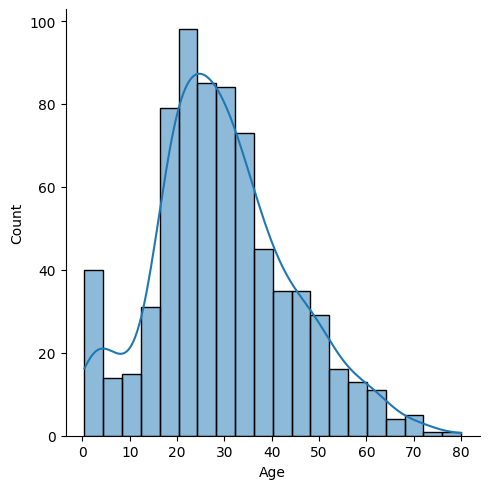

In [110]:
plot1=sns.displot(df['Age'], kde=True)

In [111]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df['Age'] = imputer.fit_transform(df[['Age']])

In [112]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [113]:
df['Age'].var()

169.05239993721085

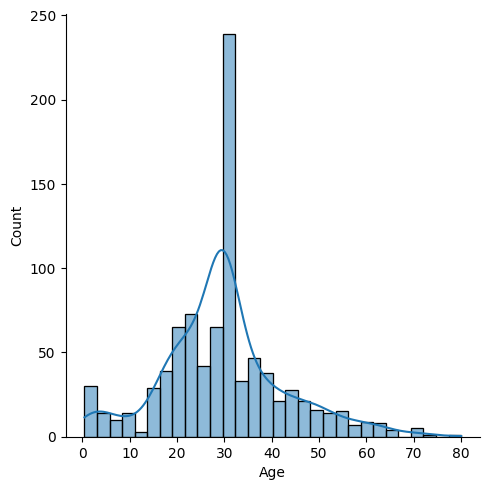

In [114]:
plot2=sns.displot(df['Age'], kde=True)

In [115]:
# will be dropping cabin as 77% of its data is missing

In [116]:
df=df.drop(['Cabin'],axis=1)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22.000000,7.2500,S,1
1,1,1,female,38.000000,71.2833,C,1
2,1,3,female,26.000000,7.9250,S,0
3,1,1,female,35.000000,53.1000,S,1
4,0,3,male,35.000000,8.0500,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0
887,1,1,female,19.000000,30.0000,S,0
888,0,3,female,29.699118,23.4500,S,3
889,1,1,male,26.000000,30.0000,C,0


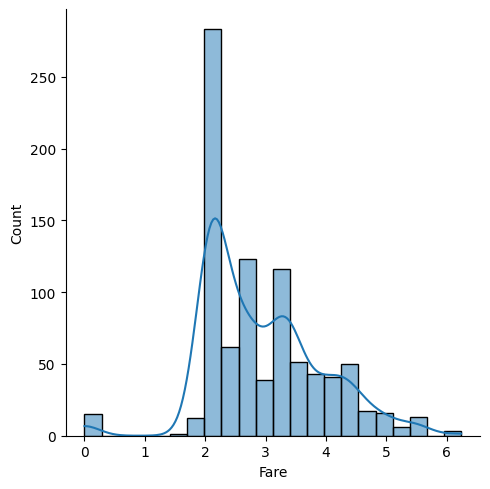

In [118]:
df["Fare"] = np.log(df["Fare"] + 1)
sns.displot(df["Fare"], kde=True)

In [119]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,male,22,2,S,1
1,1,1,female,38,4,C,1
2,1,3,female,26,2,S,0
3,1,1,female,35,3,S,1
4,0,3,male,35,2,S,0
...,...,...,...,...,...,...,...
886,0,2,male,27,2,S,0
887,1,1,female,19,3,S,0
888,0,3,female,29,3,S,3
889,1,1,male,26,3,C,0


In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int64 
 4   Fare      891 non-null    int64 
 5   Embarked  891 non-null    object
 6   family    891 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 48.9+ KB


# EDA

In [65]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

Text(0.5, 1.0, 'Survival Distribution')

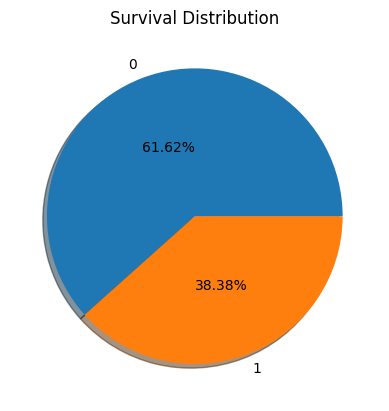

In [70]:
survive=df['Survived'].value_counts().index
survive_value=df['Survived'].value_counts().values
plt.pie(survive_value,labels=survive,pctdistance=0.5,shadow=True,autopct='%1.2f%%')
plt.title('Survival Distribution')

<Axes: xlabel='Pclass', ylabel='count'>

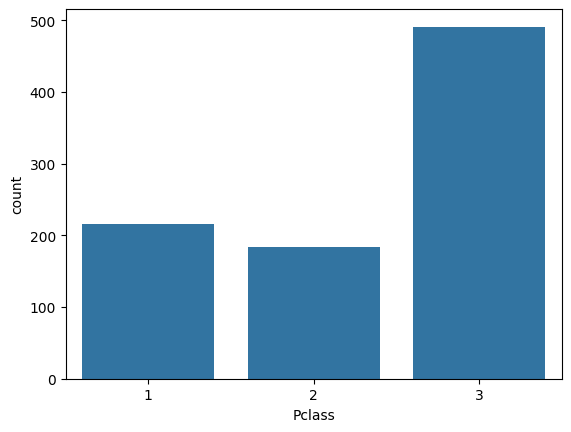

In [81]:
sns.countplot(x='Pclass',data=df)

Text(0.5, 1.0, 'Survival Rate by Passenger Class')

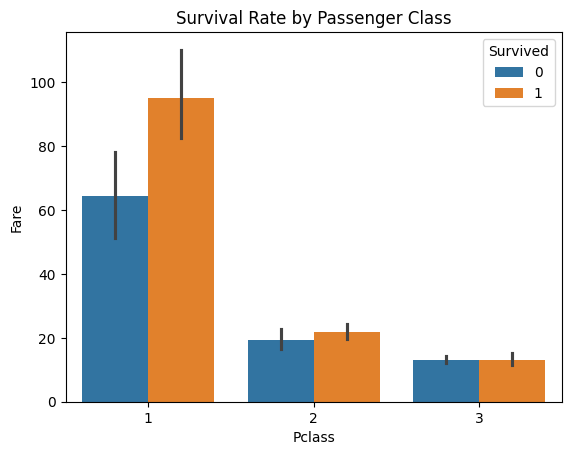

In [90]:
sns.barplot(data=df, x="Pclass", y="Fare", hue="Survived")
plt.title('Survival Rate by Passenger Class')


Text(0.5, 1.0, 'Survival Rate by Embarked')

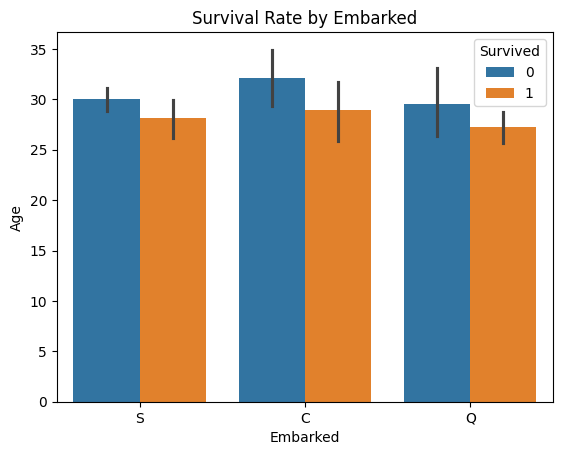

In [91]:
sns.barplot(data=df, x="Embarked", y="Age", hue="Survived")
plt.title('Survival Rate by Embarked')

In [94]:
x = pd.DataFrame(
    (
        pd.pivot_table(
            df,
            index="Survived",
            columns="Sex",
            aggfunc="count",
        )
    )
)
print()
print(
    pd.pivot_table(
        df, index="Survived", columns="Pclass", aggfunc="count"
    )
)
print()
print(
    pd.pivot_table(
        df,
        index="Survived",
        columns="Embarked",
        aggfunc="count",
    )
)
print()
x


          Age          Embarked          Fare           Sex          family  \
Pclass      1   2    3        1   2    3    1   2    3    1   2    3      1   
Survived                                                                      
0          80  97  372       80  97  372   80  97  372   80  97  372     80   
1         136  87  119      134  87  119  136  87  119  136  87  119    136   

                   
Pclass     2    3  
Survived           
0         97  372  
1         87  119  

         Age          Fare          Pclass          Sex          family      \
Embarked   C   Q    S    C   Q    S      C   Q    S   C   Q    S      C   Q   
Survived                                                                      
0         75  47  427   75  47  427     75  47  427  75  47  427     75  47   
1         93  30  217   93  30  217     93  30  217  93  30  217     93  30   

               
Embarked    S  
Survived       
0         427  
1         217  



Age      Embarked        Fare      Pclass      family     
Sex      female male   female male female male female male female male
Survived                                                              
0            81  468       81  468     81  468     81  468     81  468
1           233  109      231  109    233  109    233  109    233  109

# DATA PREDICTION

In [121]:
from sklearn.preprocessing import LabelEncoder

cols = ["Sex", "Embarked"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,22,2,2,1
1,1,1,0,38,4,0,1
2,1,3,0,26,2,2,0
3,1,1,0,35,3,2,1
4,0,3,1,35,2,2,0


In [122]:
X = df.drop(columns=["Survived"], axis=1)
y = df["Survived"]
df

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,1,22,2,2,1
1,1,1,0,38,4,0,1
2,1,3,0,26,2,2,0
3,1,1,0,35,3,2,1
4,0,3,1,35,2,2,0
...,...,...,...,...,...,...,...
886,0,2,1,27,2,2,0
887,1,1,0,19,3,2,0
888,0,3,0,29,3,2,3
889,1,1,1,26,3,0,0


In [165]:
from sklearn.model_selection import train_test_split, cross_val_score


def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=40
    )
    model.fit(x_train, y_train)
    print("Accuracy", model.score(x_test, y_test))

    score = cross_val_score(model, X, y, cv=5)
    print("CV SCORE :", np.mean(score))

In [166]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
classify(model)

Accuracy 0.7713004484304933
CV SCORE : 0.793528340970435


In [167]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
classify(model)

Accuracy 0.8026905829596412
CV SCORE : 0.7923733601154981


In [168]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
classify(model)

Accuracy 0.7713004484304933
CV SCORE : 0.7923859142552256


In [169]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
classify(model)

Accuracy 0.7937219730941704
CV SCORE : 0.8013997865796245


In [170]:
!pip install xgboost

In [171]:
from xgboost import XGBClassifier

model = XGBClassifier()
classify(model)

Accuracy 0.7847533632286996
CV SCORE : 0.8092272926997678


In [ ]:
## FOR NOW BEST MODEL IS XGBClassifier()

In [172]:
model = XGBClassifier()
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [174]:
pred = model.predict(x_test)
pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1])

# Accurracy of this model is Accuracy 78.47% & CV SCORE : 80.92%